In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
file_path = r"D:\Mobile data analytics\smartphones_cleaned_v6.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


First few rows of the dataset:
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 

In [12]:
# Convert infinite values to NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values
# Impute numerical columns with the mean value
numerical_columns = ['rating', 'num_cores', 'processor_speed', 'battery_capacity',
                     'fast_charging', 'num_front_cameras', 'primary_camera_front', 'extended_upto']
imputer_num = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer_num.fit_transform(data[numerical_columns])

# Impute categorical columns with the most frequent value
categorical_columns = ['brand_name', 'model', 'processor_brand', 'os', 
                       'has_5g', 'has_nfc', 'has_ir_blaster', 'fast_charging_available', 
                       'extended_memory_available']
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_cat.fit_transform(data[categorical_columns])

# Verify that there are no more missing values
print("\nMissing values after imputation:")
print(data.isnull().sum())

# Encode categorical columns
laenc = LabelEncoder()
for col in categorical_columns:
    data[col] = laenc.fit_transform(data[col])

# Display the first few rows of the encoded dataset
print("\nEncoded dataset:")
print(data.head())



Missing values after imputation:
brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
resolution_width             0
resolution_height            0
dtype: int64

Encoded dataset:
   brand_name  model  price  rating  has_5g  has_nfc  has_ir_blaster  \
0          29    307  54999    89.0       1        1     

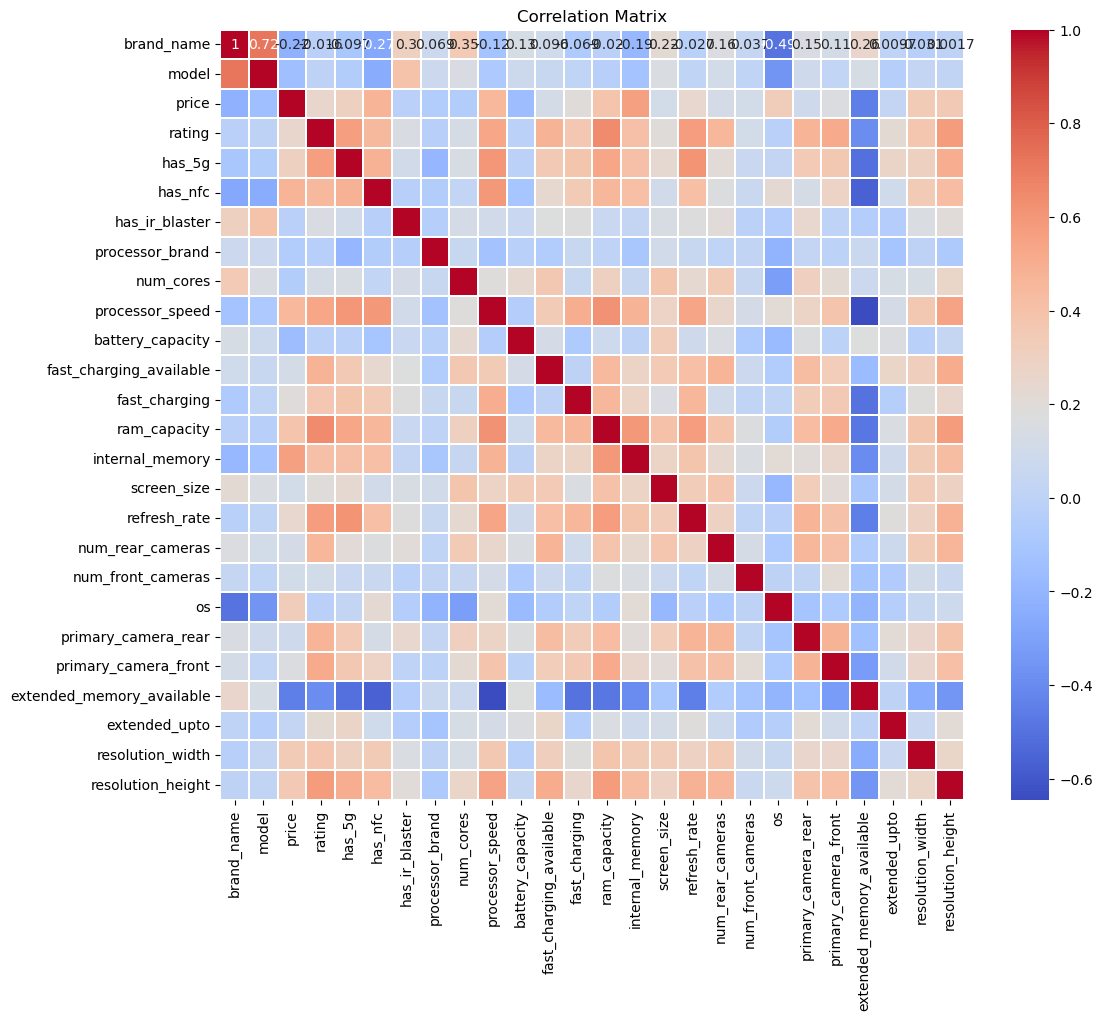

D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


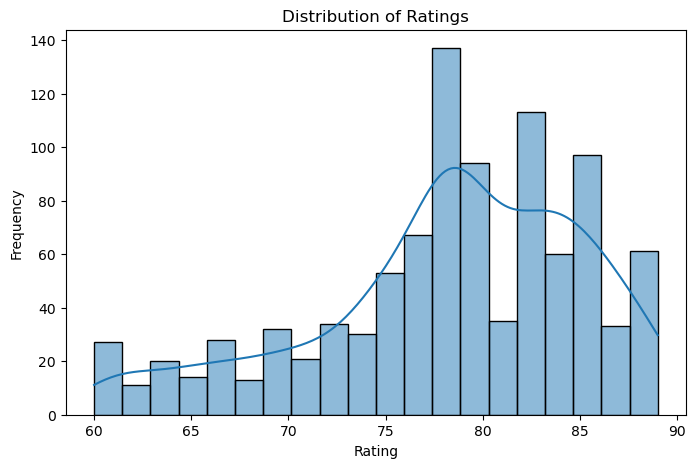

D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

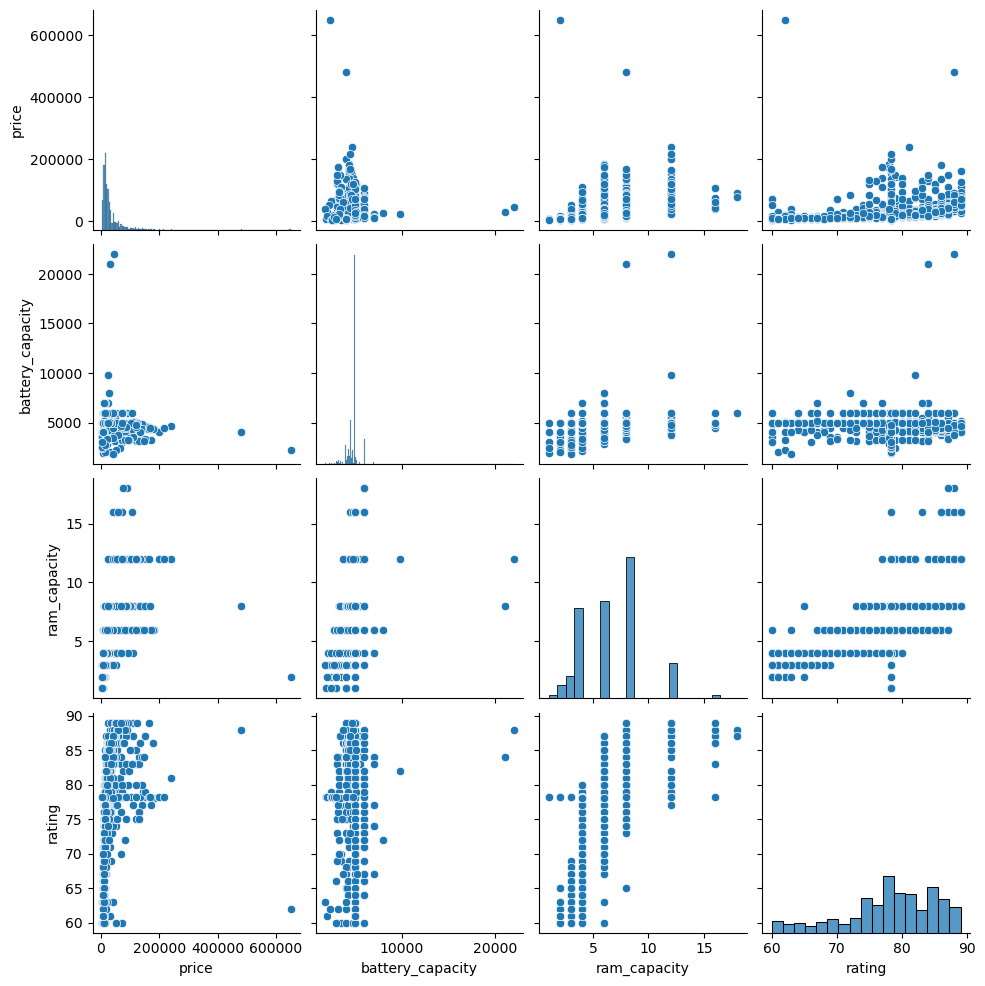

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable 'rating'
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Pair plot of the first few features and 'rating'
sns.pairplot(data[['price', 'battery_capacity', 'ram_capacity', 'rating']])
plt.show()


In [14]:
# Define features (X) and target (y)
X = data.drop('rating', axis=1).values
y = data['rating'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Verify the split
print(f"\nTraining features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")



Training features shape: (735, 25)
Test features shape: (245, 25)
Training labels shape: (735,)
Test labels shape: (245,)



Linear Regression Results:
Mean Squared Error: 19.84285727962079
R-squared: 0.5850114322295614


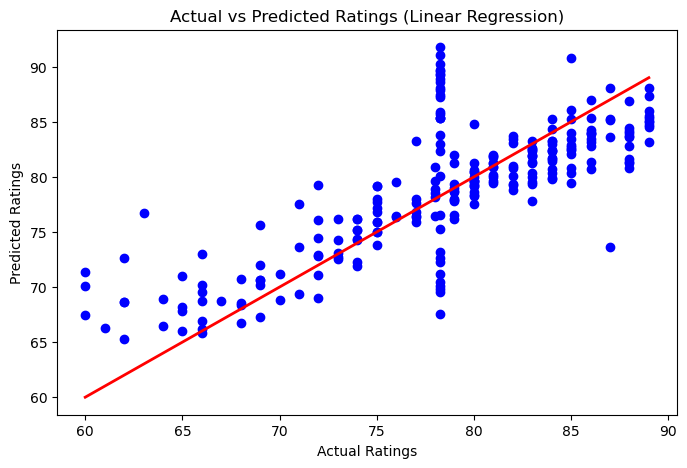

In [19]:
# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_lr = lin_reg.predict(X_test)

# Evaluate Linear Regression
print("\nLinear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Ratings (Linear Regression)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()




































Random Forest Regressor Results:
Mean Squared Error: 9.587951090610533
R-squared: 0.7994799823999178


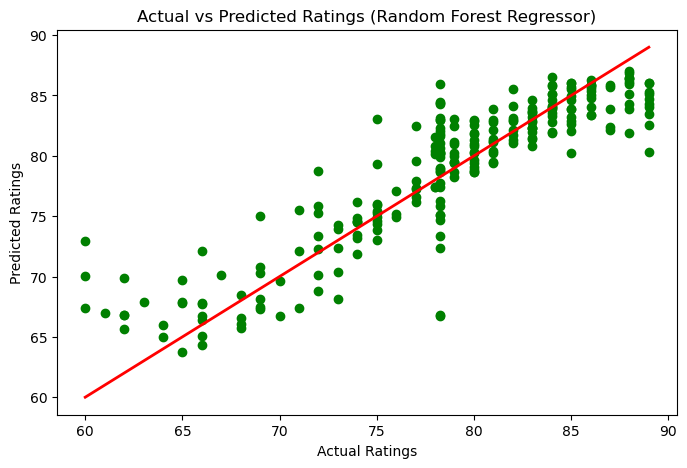

In [16]:
# Train Random Forest Regressor
rf_reg = RandomForestRegressor(max_depth=10, random_state=0)
rf_reg.fit(X_train, y_train)

# Predict using Random Forest Regressor
y_pred_rf = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
print("\nRandom Forest Regressor Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

# Plot Actual vs Predicted for Random Forest Regressor
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Ratings (Random Forest Regressor)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


In [17]:
# Save Linear Regression model
joblib.dump(lin_reg, r"D:\Mobile data analytics\linear_regression_model.pkl")

# Save Random Forest Regressor model
joblib.dump(rf_reg, r"D:\Mobile data analytics\random_forest_regressor_model.pkl")

# Load models (optional)
# linear_regression_model = joblib.load(r"D:\Mobile data analytics\linear_regression_model.pkl")
# random_forest_regressor_model = joblib.load(r"D:\Mobile data analytics\random_forest_regressor_model.pkl")


['D:\\Mobile data analytics\\random_forest_regressor_model.pkl']